In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Hyunjin Kang\\Documents\\Kelly Kang'

## 1) Load Data

In [3]:
hr=pd.read_csv('hr_data.txt')
hr['dept']=hr['sales']
hr.drop('sales',1,inplace=True)

In [94]:
np.sum(hr.isnull())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
dept                     0
salary_num               0
dtype: int64

In [7]:
q={'low':0,'medium':1,'high':2}
hr['salary_num']=[q[i] for i in hr['salary']]

In [8]:
hr.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dept,salary_num
0,0.38,0.53,2,157,3,0,1,0,low,sales,0
1,0.80,0.86,5,262,6,0,1,0,medium,sales,1
2,0.11,0.88,7,272,4,0,1,0,medium,sales,1
3,0.72,0.87,5,223,5,0,1,0,low,sales,0


## 2) EDA

### Correlation Graph 


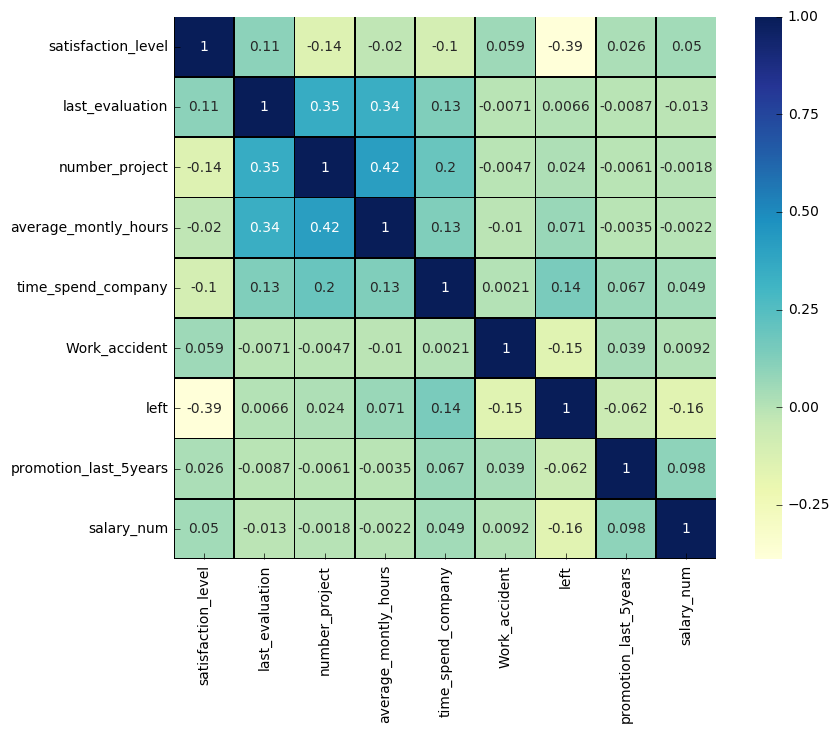

In [208]:
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(hr.corr(),linewidths=0.5,square=True,annot=True, cmap='YlGnBu',linecolor='black')

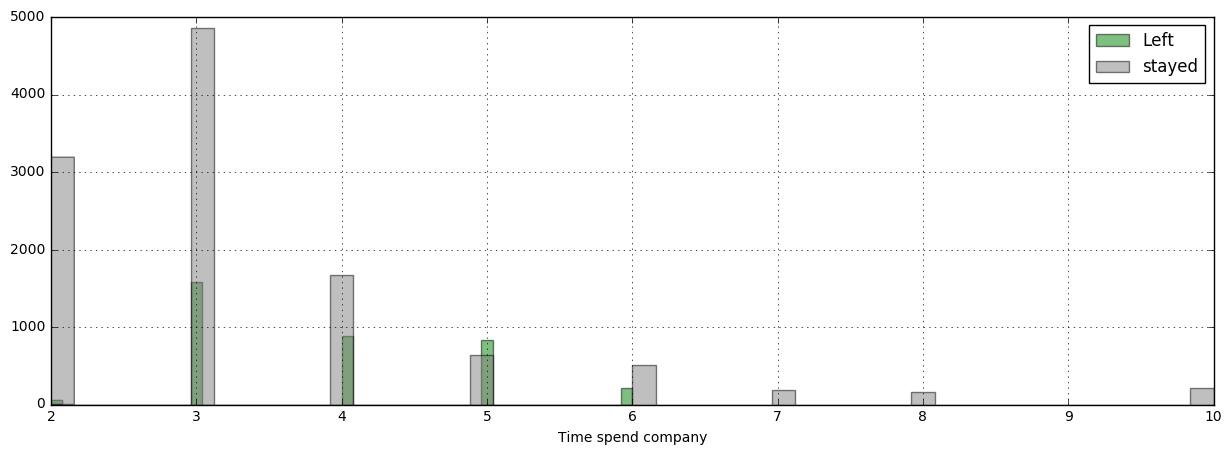

In [227]:
plt.figure(figsize=(15,5))
hr[hr['left']==1]['time_spend_company'].hist(bins=50,color='green',alpha=0.5,label='Left') #left
hr[hr['left']==0]['time_spend_company'].hist(bins=50,color='gray',alpha=0.5,label='stayed') #stayed
plt.legend()
plt.xlabel('Time spend company')
plt.show()

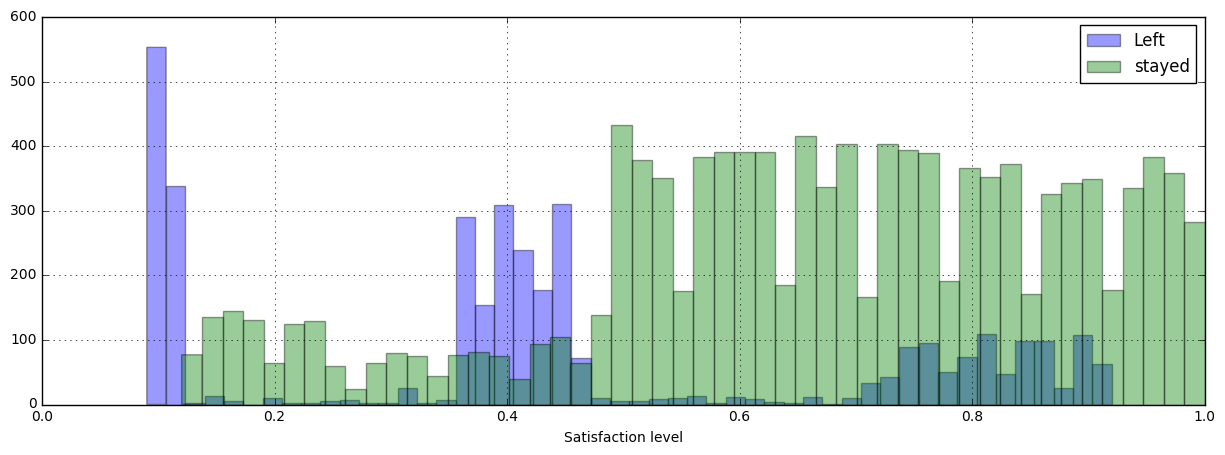

In [204]:
plt.figure(figsize=(15,5))
hr[hr['left']==1]['satisfaction_level'].hist(bins=50,color='blue',alpha=0.4,label='Left') #left
hr[hr['left']==0]['satisfaction_level'].hist(bins=50,color='green',alpha=0.4,label='stayed') #stayed
plt.legend()
plt.xlabel('Satisfaction level')
plt.show()

- Employees who stayed have higher satisfaction level average than who left

In [97]:
print(np.mean(hr[hr['left']==1]['satisfaction_level']))
print(np.mean(hr[hr['left']==0]['satisfaction_level']))

0.44009801176140917
0.666809590479516


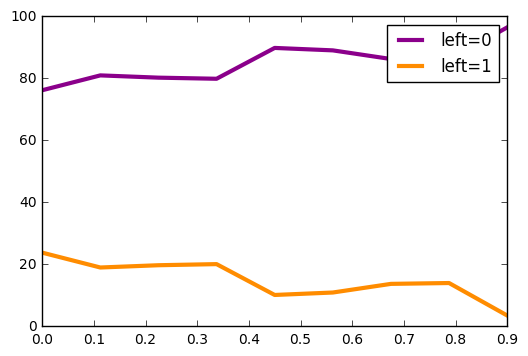

In [141]:
a=np.linspace(0,0.9,9)
b=[]
q=[]
for i in a:
    m=(np.sum(hr[hr['satisfaction_level']>i]['left']==0))/hr[hr['satisfaction_level']>i].shape[0]*100
    n=(np.sum(hr[hr['satisfaction_level']>i]['left']==1))/hr[hr['satisfaction_level']>i].shape[0]*100
    b.append(m)
    q.append(n)
    
plt.plot(a,b,color="#8B008B",label='left=0',lw=3)
plt.plot(a,q,color="#FF8C00",label='left=1',lw=3)
plt.legend()

In [140]:
print((np.sum(hr[hr['satisfaction_level']>0.47]['left']==0))/hr[hr['satisfaction_level']>0.47].shape[0]*100)
print((np.sum(hr[hr['satisfaction_level']>0.47]['left']==1))/hr[hr['satisfaction_level']>0.47].shape[0]*100)

90.3842583999
9.61574160015


- 90.4% of Employees above satisfaction level 0.47 stayed
- 9.6% of Employees above satisfaction level 0.47 left

In [202]:
print((np.sum(hr[hr['satisfaction_level']<=0.47]['left']==0))/hr[hr['satisfaction_level']<=0.47].shape[0]*100)
print((np.sum(hr[hr['satisfaction_level']<=0.47]['left']==1))/hr[hr['satisfaction_level']<=0.47].shape[0]*100)

40.0
60.0


- 40% of Employees below satisfaction level 0.47 stayed
- 60% of Employees below satisfaction level 0.47 left

## What impacts Satisfaction level?

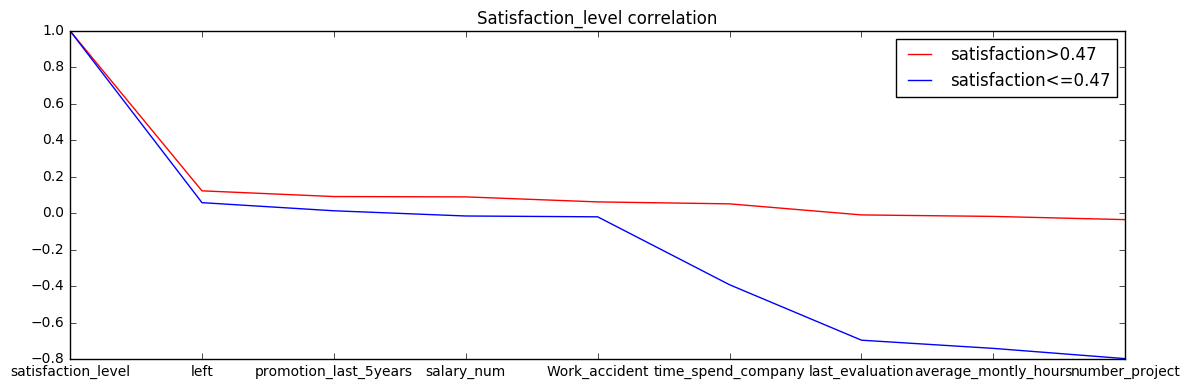

In [190]:
plt.figure(figsize=(12,4))
hr_sat=hr[hr['satisfaction_level']>0.47]
hr_sat.corr()['satisfaction_level'].sort_values(ascending=False).plot(color='red',label='satisfaction>0.47')
hr[hr['satisfaction_level']<=0.47].corr()['satisfaction_level'].sort_values(ascending=False).plot(color='blue',label='satisfaction<=0.47')
plt.legend()
plt.title("Satisfaction_level correlation")
plt.tight_layout()

### Correlation - Satisfaction level above 0.47

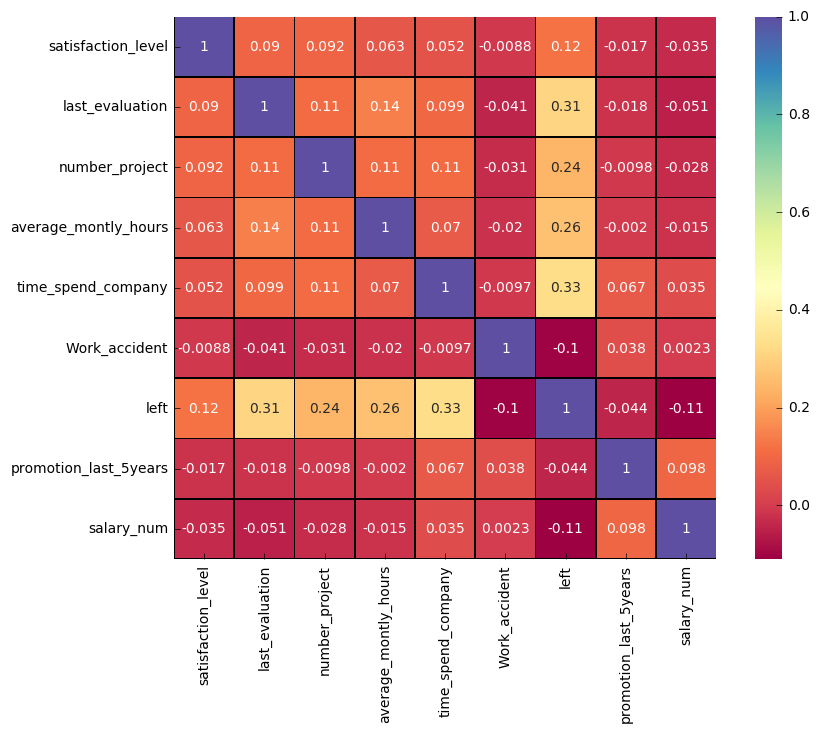

In [207]:
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(hr_sat.corr(),linewidths=0.5,square=True,annot=True,linecolor='black',cmap='Spectral')

- Given satisfaction level above 0.47, there's high correlation between time spent at the company and employees' leaving

In [200]:
larger=[]
smaller=[]
for i in hr_sat.drop(['salary','dept'],1).columns:
    if hr_sat[i].mean() > hr[hr['satisfaction_level']<=0.47][i].mean():
        larger.append(i)
    else:
        smaller.append(i)
print('Satisfaction level bigger than 0.47 is smaller on:',smaller)
print('Satisfaction level bigger than 0.47 is larger on :',larger)

Satisfaction level bigger than 0.47 is smaller on: ['time_spend_company', 'left']
Satisfaction level bigger than 0.47 is larger on : ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'salary_num']


- Employees with satisfaction above 0.47 have higer average value on 1) last evaluation, 2) number of projects, 3)average monthly hours, 4) work accident, 5) promotion, and 6) salary. Employees with satisfaction level above 0.47 not only are likely to not leave the company, but also have higher evaluation, number of projects, average montly hours, work accidents, promotions, and salary than those with lower satisfaction level.

- Employee with satisfaction level below 0.47 have higher average value on time spend at company. However, the differences are quite minimal as below

In [201]:
print(hr[hr['satisfaction_level']<=0.47]['time_spend_company'].mean())
print(hr[hr['satisfaction_level']>0.47]['time_spend_company'].mean())

3.714319526627219
3.413495452014108


In [154]:
print(hr_sat['promotion_last_5years'].mean())
print(hr[hr['satisfaction_level']<=0.47]['promotion_last_5years'].mean())

0.02478188230926304
0.012307692307692308


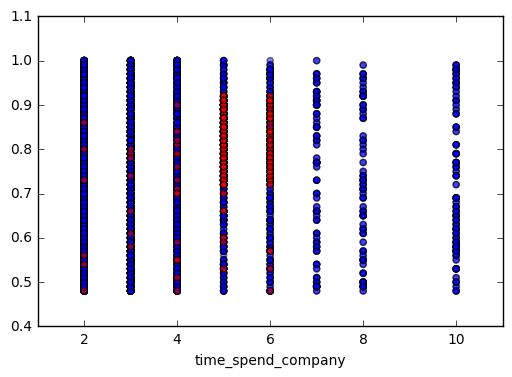

In [216]:
ca={1:'red',0:'blue'}
x_ca=[ca[i] for i in hr_sat['left']]
plt.scatter(hr_sat['time_spend_company'],hr_sat['satisfaction_level'],c=x_ca,alpha=0.5)
plt.xlabel('time_spend_company')

- Given employees with satisfaction level above 0.47, Employees who left spent at the company no longer than 6 years

## 3) Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()

In [54]:
X=hr.drop(['salary','dept','left'],1)
y=hr['left']

In [55]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_num
0,0.38,0.53,2,157,3,0,0,0
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,0
4,0.37,0.52,2,159,3,0,0,0


In [56]:
scaler.fit(X)
X_std=scaler.transform(X)

## 4) PCA

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca=PCA(n_components=8)
pca.fit(X_std)

PCA(copy=True, n_components=8, whiten=False)

In [59]:
print(pca.explained_variance_ratio_)

[ 0.22875775  0.14458473  0.13905153  0.12302935  0.11180303  0.10530553
  0.07901014  0.06845794]


In [223]:
a=np.cumsum(pca.explained_variance_ratio_)

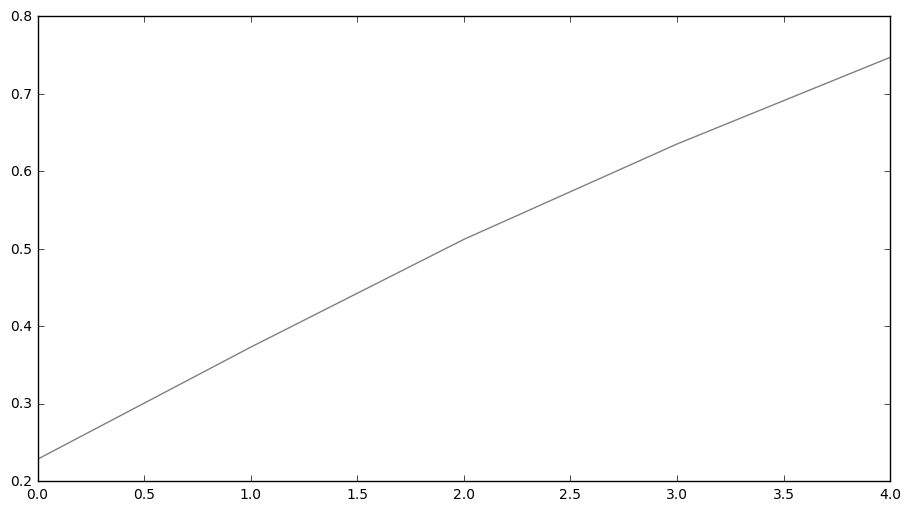

In [225]:
plt.figure(figsize=(11,6))
plt.plot(a,c='gray')
plt.ylabel='pca explained variance'

In [62]:
pca=PCA(n_components=5)
pca.fit(X_std)
X_pca=pca.transform(X_std)
X_pca=pd.DataFrame(X_pca,columns='pca1 pca2 pca3 pca4 pca5'.split())

In [63]:
X_pca.head()

,pca1,pca2,pca3,pca4,pca5
0,1.903824,1.254154,-0.525465,0.199817,-0.522420
1,-2.138330,-0.670115,-0.139766,-0.636531,0.352130
2,-3.060510,0.990125,-1.232834,-0.156838,0.722947
3,-1.547165,0.388094,0.371010,-0.021642,-0.662496
4,1.907925,1.282347,-0.563941,0.212489,-0.513040


## 5) KMeans

In [64]:
from sklearn.cluster import KMeans

In [65]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_pca)
X_km=kmeans.predict(X_pca)

In [66]:
X_pca['cluster']=X_km

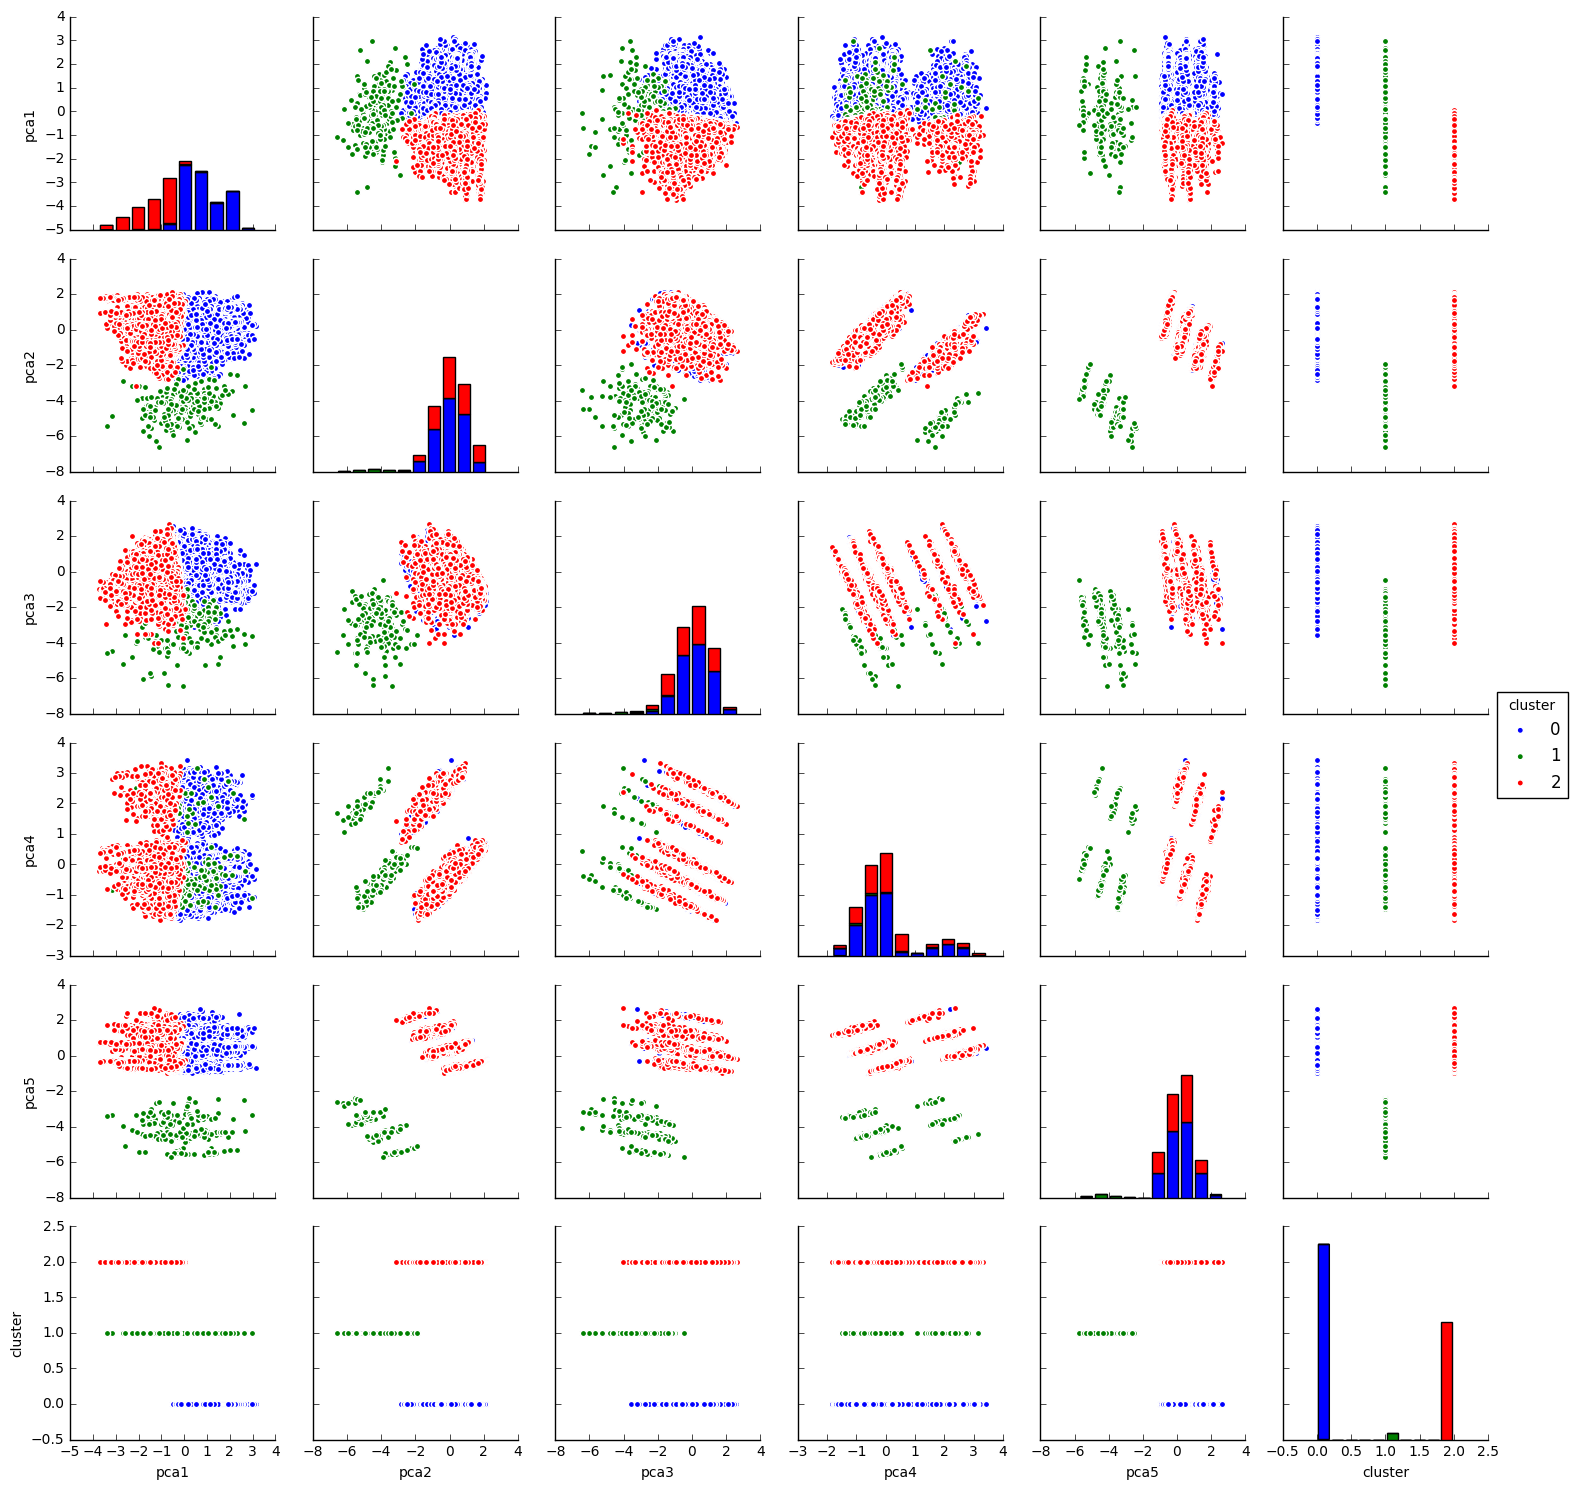

In [67]:
sns.pairplot(X_pca,hue='cluster')

In [68]:
label_c={0:'r',1:'g',2:'b'}
x_c=[label_c[i] for i in X_km]

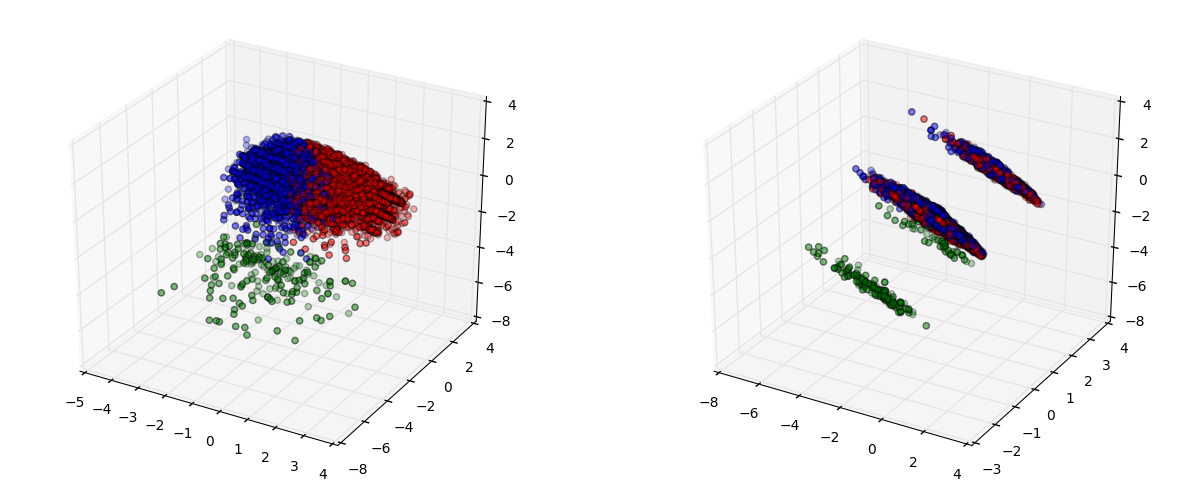

In [88]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X_pca['pca1'],X_pca['pca2'],X_pca['pca3'],c=x_c,alpha=0.3)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X_pca['pca3'],X_pca['pca4'],X_pca['pca5'],c=x_c,alpha=0.3)